# Initialize system

In [1]:
### Setup the library ###
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
import math
import pprint
import inspect 
top_level=f'{os.getcwd()}/../'
rootTopLevel = top_level+'script/'
pr.addLibraryPath( rootTopLevel )

import setupLibPaths

import ePix320kM as devBoard

args = None

# ONLY RUN ONCE!
# Defining root
# If crashes, make sure the deve is correct.
root =  devBoard.Root(   
        top_level  = top_level,
        dev        = '/dev/datadev_0',
        pollEn     = False,
        initRead   = True,
        pciePgpEn  = False,
        justCtrl   = False)
root.start()

# example showing a read
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

Root.Core.Si5345Pll.Page0.DataBlock.setPollInterval(1)
Start: Started zmqServer on ports 9099-9101
    To start a gui: python -m pyrogue gui --server='localhost:9099'
    To use a virtual client: client = pyrogue.interfaces.VirtualClient(addr='localhost', port=9099)
Root.Core.AxiVersion count reset called
###################################################
#             Firmware Version                    #
###################################################
Path         = Root.Core.AxiVersion
FwVersion    = 0x1010900
UpTime       = 24 days, 19:33:06
GitHash      = 0x6393c7e60615a7228de0d1b59879ce66510e73da
XilinxDnaId  = 0x4002000001608a0624908185
FwTarget     = ePixHRM320k
BuildEnv     = Vivado v2023.1
BuildServer  = rdsrv314 (Ubuntu 20.04.6 LTS)
BuildDate    = Thu 30 May 2024 04:17:10 PM PDT
Builder      = dnajjar
###################################################


In [2]:
# Useful short names
APP  = root.App
AXIV = root.Core.AxiVersion
ASICTOP = APP.AsicTop
TRIG = ASICTOP.TriggerRegisters
ASIC0 = APP.Mv2Asic[0]
ASIC1 = APP.Mv2Asic[1]
ASIC2 = APP.Mv2Asic[2]
ASIC3 = APP.Mv2Asic[3]
HSDAC = APP.Dac.FastDac 
PKREG0 = ASICTOP.DigAsicStrmRegisters0
PKREG1 = ASICTOP.DigAsicStrmRegisters1
PKREG2 = ASICTOP.DigAsicStrmRegisters2
PKREG3 = ASICTOP.DigAsicStrmRegisters3
BATCHER0 = ASICTOP.BatcherEventBuilder0
BATCHER1 = ASICTOP.BatcherEventBuilder1
BATCHER2 = ASICTOP.BatcherEventBuilder2
BATCHER3 = ASICTOP.BatcherEventBuilder3
DEBUG0 = root._dbg[0]
DEBUG1 = root._dbg[1]
DEBUG2 = root._dbg[2]
DEBUG3 = root._dbg[3]
DATARCV0 = root.DataReceiver0
DATARCV1 = root.DataReceiver1
DATARCV2 = root.DataReceiver2
DATARCV3 = root.DataReceiver3
FULLRATERCV0 = root.fullRateDataReceiver[0]
FULLRATERCV1 = root.fullRateDataReceiver[1]
FULLRATERCV2 = root.fullRateDataReceiver[2]
FULLRATERCV3 = root.fullRateDataReceiver[3]

In [3]:
# Set & Read ScratchPad
print(hex(AXIV.ScratchPad.get()))
AXIV.ScratchPad.set(0xdeadbeef)
print(hex(AXIV.ScratchPad.get()))

0xdeadbeef
0xdeadbeef


In [4]:
# Configure clock to 168 MHz and configures all ASICS
root.InitASIC([4,0,0,1,1])

Rysync ASIC started
Did not find SspMonGrp_carrier file. Using generic.
Did not find SspMonGrp_carrier file. Using generic.
Did not find specific ASIC1 file. Using generic.
Did not find specific ASIC2 file. Using generic.
Did not find specific ASIC3 file. Using generic.
Did not find specific ASIC4 file. Using generic.
Init ASIC script started
Loading PLL configuration
Loading supply configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k-latest/software/notebook/..//config/ePixHRM320k_PowerSupply_Enable.yml
Loading lane delay configurations
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k-latest/software/notebook/..//config/ePixHRM320k_SspMonGrp_carrier.yml
Loading waveforms configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k-latest/software/notebook/..//config/ePixHRM320k_RegisterControl.yml
Loading batcher configurations
Loading /afs/slac.sta

In [5]:
# change here
ASICNUM=2
DEBUG=DEBUG2
ASIC=ASIC2

In [6]:
root.disableAndCleanAllFullRateDataRcv()
root.enableDataRcv(False)
root.enableAllAsics(False)
root.enableAsic(ASICNUM, True)
DEBUG.enableDataDebug(True)
DEBUG.cleanData()

# Lorenzo - Helper functions

In [7]:
%run dataProcFunctions.ipynb     #this is were my function was stored

# Set registers and variables

--- Acquiring data value 0/0 ---
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3

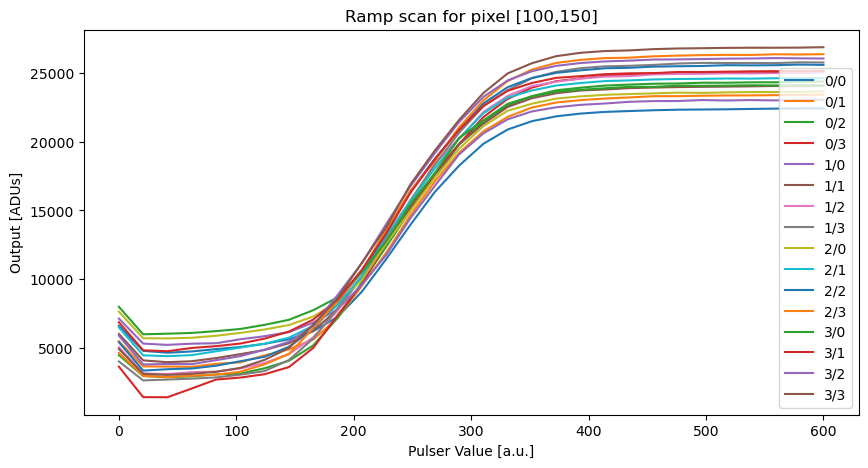

In [8]:
# Set threshold to the minimum voltage (maximum energy, should not switch)
ASIC.CompTH_ePixM.set(0)

# Reference pixel
ref_row = 100
ref_col = 150

plt.figure(figsize = (10,5))


for RefN_val, RefP_val in np.ndindex(4,4):
    print('--- Acquiring data value {}/{} ---'.format(RefN_val,RefP_val))
    ASIC.RefinN.set(RefN_val)
    ASIC.RefinP.set(RefP_val)
    # Get ramps and calculate gain
    print("Collecting data for RefN_val/RefP_val={}/{}".format(RefN_val, RefP_val))
    ChInjValues, PixOutValues = ChInjRamp(DEBUG, AsicNum=ASICNUM,numberOfTriggers=3,Min=0,Max=600,numSteps=30)
    plt.plot(ChInjValues, PixOutValues, label='{}/{}'.format(RefN_val,RefP_val))

    #     gain[RefN_val,RefP_val] = np.polyfit(ChInjValues, PixOutValues, 1)[0]
   


plt.ylabel("Output [ADUs]")
plt.xlabel("Pulser Value [a.u.]")
plt.title('Ramp scan for pixel [{},{}]'.format(ref_row,ref_col))
plt.legend()

--- Acquiring data value 16 ---
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 

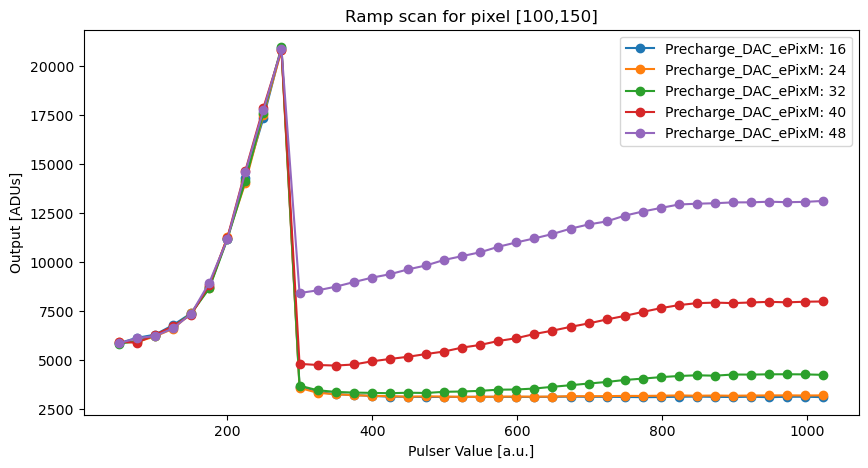

In [9]:
# Set threshold to the minimum voltage (maximum energy, should not switch)
ASIC.CompTH_ePixM.set(32)
ASIC.RefinN.set(6)
ASIC.RefinP.set(1)


# Reference pixel
ref_row = 100
ref_col = 150

plt.figure(figsize = (10,5))


for Precharge_DAC_ePixM in [16,24,32,40,48]:
    print('--- Acquiring data value {} ---'.format(Precharge_DAC_ePixM))
    ASIC.Precharge_DAC_ePixM.set(Precharge_DAC_ePixM)
    # Get ramps and calculate gain
    print("Collecting data for Precharge_DAC_ePixM={}".format(Precharge_DAC_ePixM))
    ChInjValues, PixOutValues = ChInjRamp(DEBUG, ASICNUM, numberOfTriggers=3,Min=50,Max=1023,numSteps=40)
    plt.plot(ChInjValues, clearB16(PixOutValues.astype(int)), label='Precharge_DAC_ePixM: {}'.format(Precharge_DAC_ePixM),marker='o')
  
plt.ylabel("Output [ADUs]")
plt.xlabel("Pulser Value [a.u.]")
plt.title('Ramp scan for pixel [{},{}]'.format(ref_row,ref_col))
plt.legend()

# Verify that we can run in fixed HG / fixed LG by changing the Thr value

--- Acquiring data value 0 ---
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 Frames
Reading out 3 Frames
Read out 3 F

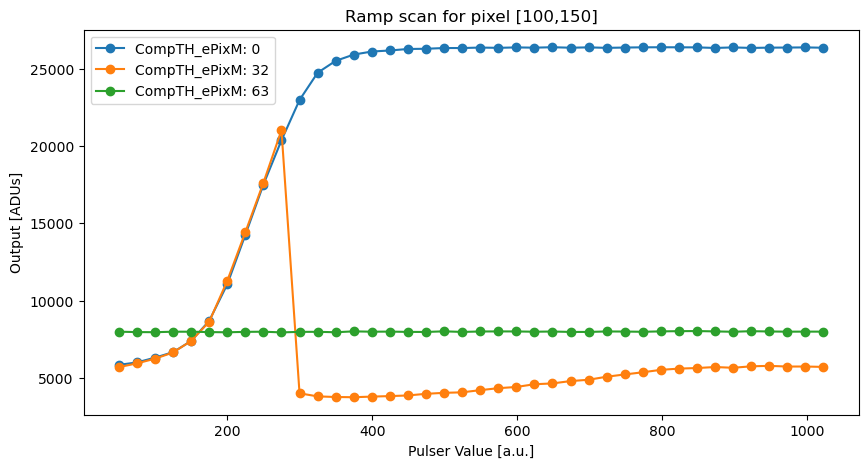

In [10]:
# Set threshold to the minimum voltage (maximum energy, should not switch)
ASIC.RefinN.set(6)
ASIC.RefinP.set(1)
ASIC.CompTH_ePixM.set(32)
ASIC.Precharge_DAC_ePixM.set(36)

# Reference pixel
ref_row = 100
ref_col = 150

plt.figure(figsize = (10,5))


for CompTH_ePixM in [0,32,63]:
    print('--- Acquiring data value {} ---'.format(CompTH_ePixM))
    ASIC.CompTH_ePixM.set(CompTH_ePixM)
    # Get ramps and calculate gain
    ChInjValues, PixOutValues = ChInjRamp(DEBUG, ASICNUM, numberOfTriggers=3,Min=50,Max=1023,numSteps=40)
    plt.plot(ChInjValues, clearB16(PixOutValues.astype(int)), label='CompTH_ePixM: {}'.format(CompTH_ePixM),marker='o')
  
plt.ylabel("Output [ADUs]")
plt.xlabel("Pulser Value [a.u.]")
plt.title('Ramp scan for pixel [{},{}]'.format(ref_row,ref_col))
plt.legend()